# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


### Tediously manipulate column names

In [3]:
scrubbed_column_names = []
for col in df.columns:
    #replace spaces and dashes with underscore
    temp_string = col.replace(' ','_').replace('-','_').replace('+','plus')
    #remove anything else that is not a number, letter, or underscore
    final_string = ''.join([i for i in temp_string if (i.isalpha() or i.isdigit() or i=='_')])
    scrubbed_column_names.append(final_string)
df.columns = scrubbed_column_names

In [4]:
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


### Train Test Split

In [5]:
#Set variables for column names oucome and x_cols
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

X = df.loc[:,x_cols]
y = df.list_price
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Concat to make train and test dataframes
df_train = pd.concat([y_train,X_train],axis=1)
df_test = pd.concat([y_test,X_test],axis=1)

### Build Initial Regression Model

In [6]:
#Make the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     573.8
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:02:32   Log-Likelihood:                -43252.
No. Observations:                8696   AIC:                         8.669e+04
Df Residuals:                    8601   BIC:                         8.737e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.6054      1.703     38.513      0.000      62.266      68.945
piece_count                                         75.0465      0.876     85.667      0.000      73.329      76.764
num_reviews                                          6.6265      0.670      9.888      0.000       5.313       7.940
play_star_rating                                     5.0933      0.602      8.465      0.000       3.914       6.273
star_rating                                         -1.3155      0.692     -1.901      0.057      -2.672       0.041
val_star_rating                                     -8.3435      0.618    -13.510      0.000      -9.554      -7.133
ages_10plus                                        127.0210      6.382     19.904      0.000     114.511     139.531
ages_10_14                                         -24.1894      8.448     -2.863      0.004     -40.750      -7.629
ages_10_16                                         -11.4707      3.926     -2.922      0.003     -19.166      -3.775
ages_10_21                                          51.7740      7.156      7.235      0.000      37.746      65.802
ages_11_16                                          -8.3137      5.679     -1.464      0.143     -19.445       2.818
ages_12plus                                         74.2914      5.600     13.267      0.000      63.315      85.268
ages_12_16                                         -63.4231      6.671     -9.507      0.000     -76.501     -50.346
ages_14plus                                         22.7587      3.997      5.694      0.000      14.924      30.594
ages_16plus                                         27.9697      5.912      4.731      0.000      16.381      39.558
ages_1_3                                            -8.5118      2.307     -3.690      0.000     -13.034      -3.990
ages_1_5                                            -4.5547      2.788     -1.633      0.102     -10.020       0.911
ages_2_5                                            14.6983      1.601      9.180      0.000      11.560      17.837
ages_4plus                                         -19.7150      6.145     -3.208      0.001     -31.761      -7.669
ages_4_7                                            -5.4236      3.168     -1.712      0.087     -11.633       0.786
ages_4_99                                           -2.1767      3.500     -0.622      0.534      -9.037       4.684
ages_5plus                                          -9.9903      2.950     -3.386      0.001     -15.773      -4.208
ages_5_12                                          -34.9775      3.040    -11.507      0.000     -40.936     -29.019
ages_5_8                                 

### Stepwise Selection Function from earlier lessons

In [22]:
def stepwise_selection(X, y,
                      initial_list=[],
                      threshold_in=0.01,
                      threshold_out = 0.05,
                      verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
 
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [23]:
stepwise_result = stepwise_selection(X_train,y_train,verbose=False)

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


In [25]:
len(stepwise_result)

45

In [26]:
stepwise_result

['review_difficulty_Challenging',
 'theme_name_SERIOUS_PLAY',
 'piece_count',
 'theme_name_Creator_Expert',
 'val_star_rating',
 'ages_2_5',
 'review_difficulty_Average',
 'theme_name_Star_Wars',
 'ages_12_16',
 'theme_name_BOOST',
 'play_star_rating',
 'ages_14plus',
 'country_CA',
 'ages_10_21',
 'country_US',
 'country_DN',
 'theme_name_THE_LEGO_NINJAGO_MOVIE',
 'theme_name_Ideas',
 'num_reviews',
 'theme_name_Indoraptor_Rampage_at_Lockwood_Estate',
 'theme_name_Juniors',
 'ages_10plus',
 'theme_name_BrickHeadz',
 'ages_9plus',
 'theme_name_Ghostbusters',
 'theme_name_Classic',
 'country_FI',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_DUPLO',
 'country_NO',
 'theme_name_DIMENSIONS',
 'theme_name_City',
 'ages_5_12',
 'review_difficulty_Very_Challenging',
 'theme_name_Marvel_Super_Heroes',
 'ages_12plus',
 'theme_name_Architecture',
 'ages_16plus',
 'ages_8plus',
 'theme_name_THE_LEGO_BATMAN_MOVIE',
 'ages_9_16',
 'theme_name_T_rex_Transport',
 'country_AU',
 'theme_na

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [27]:
x_cols = stepwise_result

In [28]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1190.
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:15:40   Log-Likelihood:                -43300.
No. Observations:                8696   AIC:                         8.669e+04
Df Residuals:                    8650   BIC:                         8.702e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           53.4336      0.973     54.895      0.000      51.526      55.342
review_difficulty_Challenging                       18.7493      1.914      9.796      0.000      14.998      22.501
theme_name_SERIOUS_PLAY                            237.3792      4.819     49.254      0.000     227.932     246.827
piece_count                                         76.4760      0.775     98.617      0.000      74.956      77.996
theme_name_Creator_Expert                         -114.4078      4.746    -24.107      0.000    -123.711    -105.105
val_star_rating                                     -9.0437      0.471    -19.182      0.000      -9.968      -8.120
ages_2_5                                            21.3453      2.565      8.320      0.000      16.316      26.374
review_difficulty_Average                           14.2186      0.968     14.690      0.000      12.321      16.116
theme_name_Star_Wars                                16.0468      1.337     12.003      0.000      13.426      18.667
ages_12_16                                         -51.0315      6.636     -7.690      0.000     -64.041     -38.022
theme_name_BOOST                                    83.5239      8.444      9.892      0.000      66.972     100.075
play_star_rating                                     4.6049      0.495      9.310      0.000       3.635       5.574
ages_14plus                                         35.8847      3.969      9.040      0.000      28.104      43.666
country_CA                                         -14.0576      1.534     -9.163      0.000     -17.065     -11.050
ages_10_21                                          56.9118      3.071     18.533      0.000      50.892      62.931
country_US                                         -11.4122      1.527     -7.475      0.000     -14.405      -8.420
country_DN                                         -12.1498      1.787     -6.800      0.000     -15.652      -8.648
theme_name_THE_LEGO_NINJAGO_MOVIE                  -11.8758      2.159     -5.499      0.000     -16.109      -7.643
theme_name_Ideas                                  -124.0644      5.310    -23.366      0.000    -134.473    -113.656
num_reviews                                          6.4216      0.617     10.406      0.000       5.212       7.631
theme_name_Indoraptor_Rampage_at_Lockwood_Estate    61.4081      7.991      7.684      0.000      45.743      77.073
theme_name_Juniors                                  13.0268      1.797      7.250      0.000       9.505      16.549
ages_10plus                                        133.6457      4.415     30.271      0.000     124.991     142.300
theme_name_BrickHeadz                    

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df[stepwise_result]
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif_result = list(zip(stepwise_result,vif))

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [29]:
x_cols = [result[0] for result in vif_result if result[1] < 5]

In [30]:
len(x_cols)

40

In [31]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1180.
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:15:48   Log-Likelihood:                -43769.
No. Observations:                8696   AIC:                         8.762e+04
Df Residuals:                    8655   BIC:                         8.791e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           55.9591      0.932     60.065      0.000      54.133      57.785
review_difficulty_Challenging                       29.1681      1.968     14.821      0.000      25.310      33.026
theme_name_SERIOUS_PLAY                            230.2466      4.906     46.929      0.000     220.629     239.864
piece_count                                         77.9240      0.654    119.197      0.000      76.642      79.205
theme_name_Creator_Expert                          -83.5443      3.221    -25.940      0.000     -89.858     -77.231
val_star_rating                                     -9.8815      0.476    -20.742      0.000     -10.815      -8.948
ages_2_5                                            21.6449      2.707      7.996      0.000      16.339      26.951
review_difficulty_Average                           14.0622      0.989     14.217      0.000      12.123      16.001
theme_name_Star_Wars                                13.6888      1.370      9.992      0.000      11.003      16.374
ages_12_16                                         -61.8434      6.778     -9.124      0.000     -75.131     -48.556
theme_name_BOOST                                    80.8837      8.881      9.107      0.000      63.475      98.293
play_star_rating                                     4.1243      0.468      8.811      0.000       3.207       5.042
ages_14plus                                         15.8780      3.749      4.235      0.000       8.528      23.228
country_CA                                         -14.2861      1.619     -8.826      0.000     -17.459     -11.113
ages_10_21                                          55.0581      3.225     17.072      0.000      48.736      61.380
country_US                                         -11.6442      1.610     -7.231      0.000     -14.801      -8.487
country_DN                                         -12.7764      1.885     -6.778      0.000     -16.472      -9.081
theme_name_THE_LEGO_NINJAGO_MOVIE                  -13.2924      2.250     -5.907      0.000     -17.703      -8.882
theme_name_Ideas                                   -35.4659      4.361     -8.132      0.000     -44.015     -26.917
num_reviews                                          5.0971      0.610      8.356      0.000       3.901       6.293
theme_name_Indoraptor_Rampage_at_Lockwood_Estate    57.7439      8.421      6.857      0.000      41.236      74.252
theme_name_Juniors                                  10.7563      1.865      5.767      0.000       7.100      14.412
ages_9plus                                          25.0681      9.813      2.554      0.011       5.832      44.305
theme_name_Ghostbusters                  

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

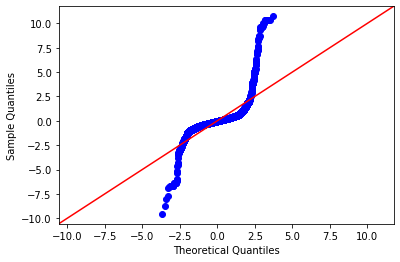

In [32]:
import scipy.stats as stats

fig = sm.graphics.qqplot(model.resid,dist=stats.norm,line='45',fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

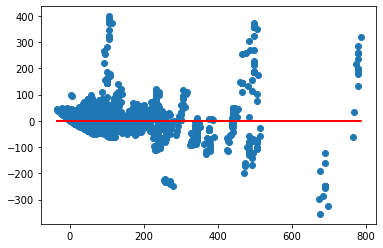

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model.predict(df_train[x_cols]), model.resid)
plt.plot(model.predict(df_train[x_cols]), [0 for i in range(len(df_train))],color='red')

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

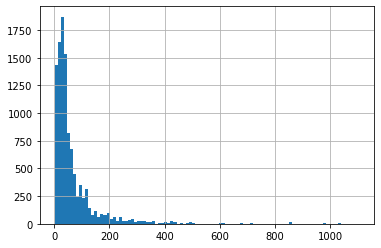

In [34]:
df[outcome].hist(bins=100)

In [35]:
for i in range(90,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [36]:
df[df[outcome] < 450]
orig_tot = len(df)
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) #Applying a log transformation
train, test = train_test_split(df)

#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     568.5
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:17:10   Log-Likelihood:                -5655.3
No. Observations:                8152   AIC:                         1.139e+04
Df Residuals:                    8111   BIC:                         1.168e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.3754      0.012    270.951      0.000       3.351       3.400
review_difficulty_Challenging                        0.6526      0.027     24.222      0.000       0.600       0.705
theme_name_SERIOUS_PLAY                              0.7333      0.067     11.005      0.000       0.603       0.864
piece_count                                          0.5540      0.009     63.874      0.000       0.537       0.571
theme_name_Creator_Expert                            0.0879      0.043      2.060      0.039       0.004       0.172
val_star_rating                                     -0.1697      0.007    -25.869      0.000      -0.183      -0.157
ages_2_5                                             0.7004      0.037     18.842      0.000       0.628       0.773
review_difficulty_Average                            0.5640      0.013     42.387      0.000       0.538       0.590
theme_name_Star_Wars                                 0.2931      0.019     15.837      0.000       0.257       0.329
ages_12_16                                          -0.0328      0.091     -0.360      0.719      -0.211       0.146
theme_name_BOOST                                     1.1184      0.141      7.909      0.000       0.841       1.396
play_star_rating                                     0.1102      0.006     17.250      0.000       0.098       0.123
ages_14plus                                          0.3725      0.052      7.134      0.000       0.270       0.475
country_CA                                          -0.3225      0.022    -14.588      0.000      -0.366      -0.279
ages_10_21                                           0.6629      0.042     15.780      0.000       0.581       0.745
country_US                                          -0.2729      0.022    -12.381      0.000      -0.316      -0.230
country_DN                                          -0.1653      0.026     -6.409      0.000      -0.216      -0.115
theme_name_THE_LEGO_NINJAGO_MOVIE                    0.1426      0.029      4.853      0.000       0.085       0.200
theme_name_Ideas                                     0.4090      0.059      6.944      0.000       0.294       0.524
num_reviews                                         -0.0467      0.008     -5.771      0.000      -0.063      -0.031
theme_name_Indoraptor_Rampage_at_Lockwood_Estate     1.2070      0.136      8.890      0.000       0.941       1.473
theme_name_Juniors                                   0.0466      0.025      1.867      0.062      -0.002       0.096
ages_9plus                                           0.1246      0.147      0.847      0.397      -0.164       0.413
theme_name_Ghostbusters                  

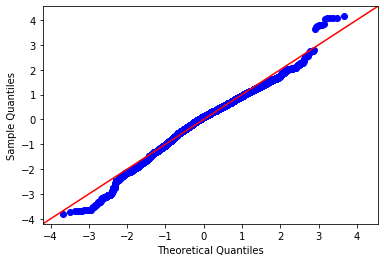

In [37]:
fig = sm.graphics.qqplot(model.resid,dist=stats.norm,line='45',fit=True)

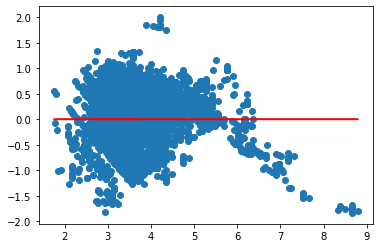

In [38]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))],color='red')

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 